In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
target=df['species']
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

C:\Users\rites\AppData\Local\Temp\ipykernel_20656\1049981169.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['petal_width'], bins=40)


Text(0.5, 1.0, 'Distribution of Petal Width')

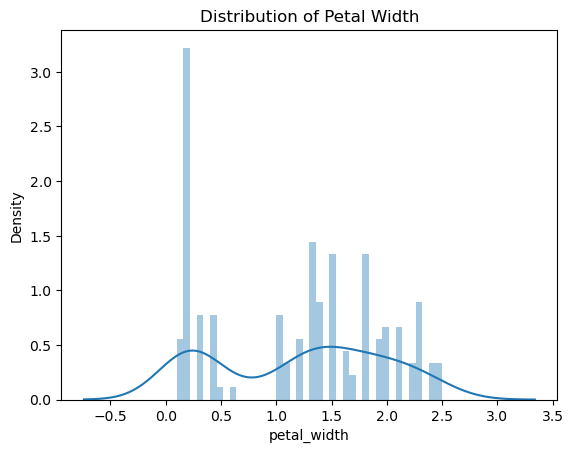

In [7]:
sns.distplot(a=df['petal_width'], bins=40)
plt.title('Distribution of Petal Width')


<Axes: xlabel='species', ylabel='count'>

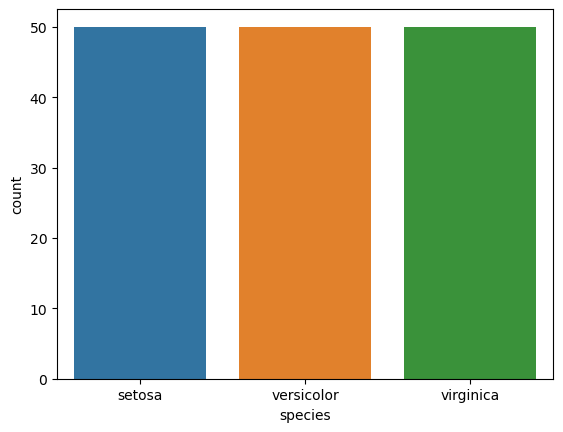

In [8]:
sns.countplot(x = 'species',data = df)

<Axes: xlabel='species', ylabel='sepal_width'>

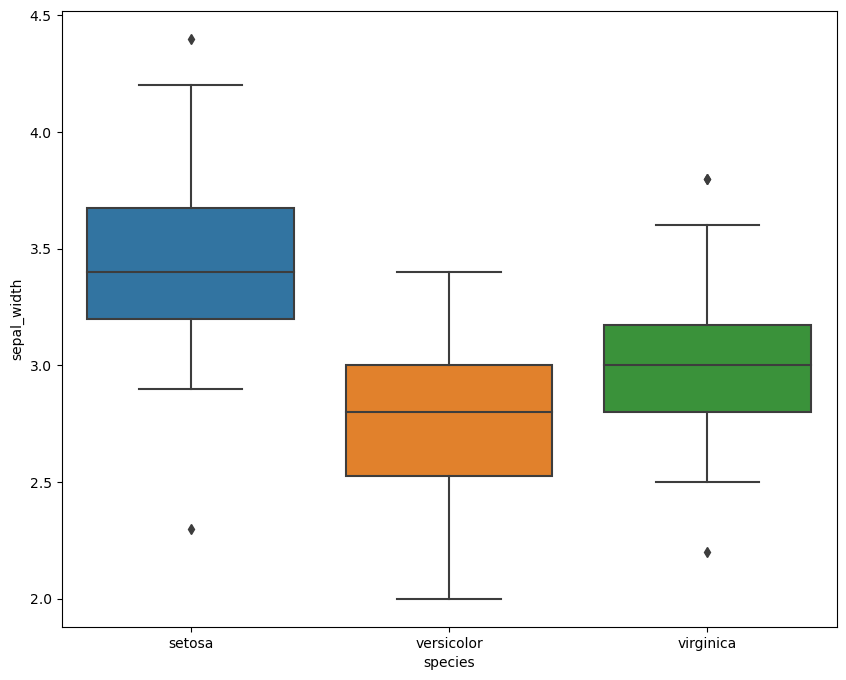

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(x='species',y='sepal_width',data=df)

In [10]:
data=df.drop('species',axis=1)

In [11]:
t=np.zeros(len(target))
t[target=='setosa']=1
t[target=='versicolor']=2
t[target=='virginica']=3

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier =GaussianNB()
classifier.fit(data,t)

GaussianNB()

In [13]:
classifier.predict(data)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train,test, t_train, t_test = train_test_split( data,t,test_size=0.4, random_state=0)

In [16]:
classifier.fit(train,t_train)

GaussianNB()

In [17]:
classifier.score(test,t_test)

0.9333333333333333

In [18]:
from sklearn.metrics import classification_report
print(classification_report(classifier.predict(test),t_test,target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.85      0.92        27
   virginica       0.81      1.00      0.89        17

    accuracy                           0.93        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.95      0.93      0.93        60



In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans=KMeans(init='random')
kmeans.fit(data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random')

In [21]:
c=kmeans.predict(data)

In [22]:
from sklearn.metrics import completeness_score,homogeneity_score
print(completeness_score(t,c))
print(homogeneity_score(t,c))

0.5049392997634629
0.9154367423408051


In [23]:
from numpy.random import rand

In [24]:
x=rand(40,1)
y=x*x*x+rand(40,1)/5

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linreg=LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [27]:
from numpy import corrcoef

In [28]:
corr=corrcoef(data)
print(corr)

[[1.         0.99599866 0.99997391 ... 0.65347343 0.6339168  0.63315839]
 [0.99599866 1.         0.99660709 ... 0.70898277 0.68625679 0.68483481]
 [0.99997391 0.99660709 1.         ... 0.65755616 0.63763128 0.6368058 ]
 ...
 [0.65347343 0.70898277 0.65755616 ... 1.         0.99570813 0.99446012]
 [0.6339168  0.68625679 0.63763128 ... 0.99570813 1.         0.99991588]
 [0.63315839 0.68483481 0.6368058  ... 0.99446012 0.99991588 1.        ]]


<Axes: >

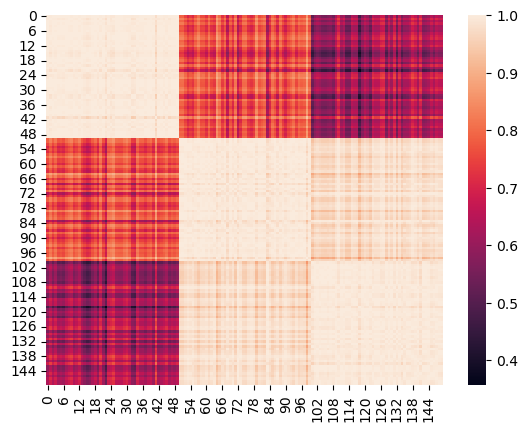

In [29]:
sns.heatmap(corr)

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [31]:
pcad=pca.fit_transform(data)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])